<a href="https://colab.research.google.com/github/nitindig/datascience/blob/master/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUCTION
**Purpose**
To apply for a master's degree is a very expensive and intensive work. With this kernel, students will guess their capacities and they will decide whether to apply for a master's degree or not.

**Dataset**
This dataset is created for prediction of graduate admissions and the dataset link is below:

https://raw.githubusercontent.com/nitindig/datascience/master/regression/Admission_Predict.csv

# **Features**
GRE Scores (290 to 340)
TOEFL Scores (92 to 120)
University Rating (1 to 5)
Statement of Purpose (1 to 5)
Letter of Recommendation Strength (1 to 5)
Undergraduate CGPA (6.8 to 9.92)
Research Experience (0 or 1)
Chance of Admit (0.34 to 0.97)
A FIRST LOOK AT THE DATASET
Importing Libraries and Reading the Dataset

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys
import os

In [0]:
url = 'https://raw.githubusercontent.com/nitindig/datascience/master/regression/Admission_Predict.csv'
df = pd.read_csv(url,sep = ",")


Basic Information about Dataset
# Some important information:

There are 9 columns: Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit
There are no null records. It's good.
There are 400 samples in total. That's enough.

df.info ():

It was used to find the number of samples and the number of features.
There is no string or null data.
Data types are int64 and float64.
Memory usage: 28.2 KB


df.head() and df.tail():

They are good to test if a feature is useful for future works.
Serial No. may be deleted because it stores index values. In the future this column does not benefit.

```
# This is formatted as code
```



In [8]:
print("There are",len(df.columns),"columns:")
for x in df.columns:
    sys.stdout.write(str(x)+", ")
    
df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})

print(df.info())
print(df.head())



There are 9 columns:
Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit, <class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB
None


Correlation between All Columns
The 3 most important features for admission to the Master: CGPA, GRE SCORE, and TOEFL SCORE
The 3 least important features for admission to the Master: Research, LOR, and SOP

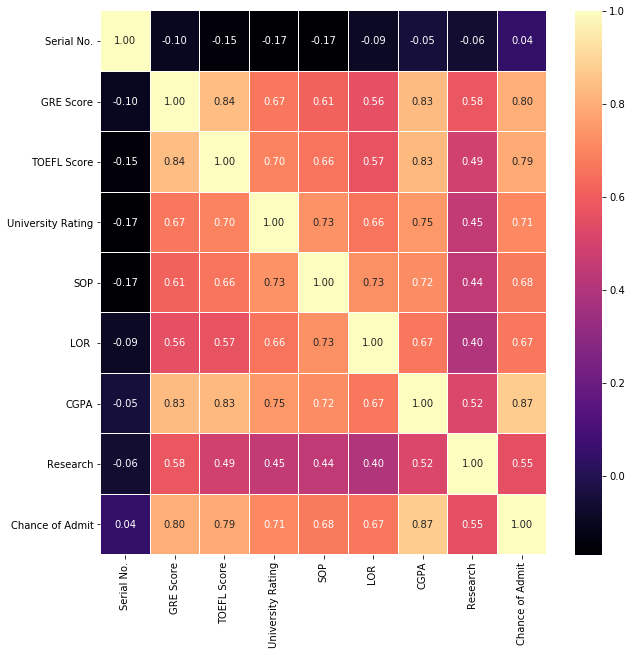

In [9]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()


# DATA VISUALIZATION TO UNDERSTAND THE DATASET


The majority of the candidates in the dataset have research experience.
Therefore, the Research will be a unimportant feature for the Chance of Admit. The correlation between Chance of Admit and Research was already lower than other correlation values.

TOEFL Score:

The lowest TOEFL score is 92 and the highest Toefl score is 120. The average is 107.41.


Not Having Research: 181
Having Research: 219


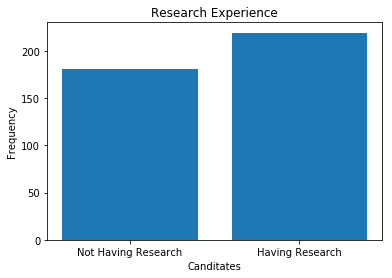

In [10]:
print("Not Having Research:",len(df[df.Research == 0]))
print("Having Research:",len(df[df.Research == 1]))
y = np.array([len(df[df.Research == 0]),len(df[df.Research == 1])])
x = ["Not Having Research","Having Research"]
plt.bar(x,y)
plt.title("Research Experience")
plt.xlabel("Canditates")
plt.ylabel("Frequency")
plt.show()

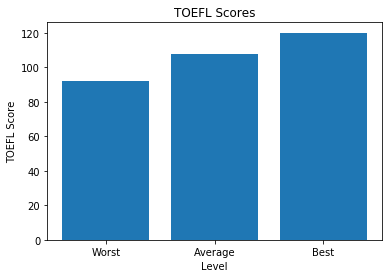

In [11]:
y = np.array([df["TOEFL Score"].min(),df["TOEFL Score"].mean(),df["TOEFL Score"].max()])
x = ["Worst","Average","Best"]
plt.bar(x,y)
plt.title("TOEFL Scores")
plt.xlabel("Level")
plt.ylabel("TOEFL Score")
plt.show()


GRE Score:

This histogram shows the frequency for GRE scores.
There is a density between 310 and 330. Being above this range would be a good feature for a candidate to stand out.

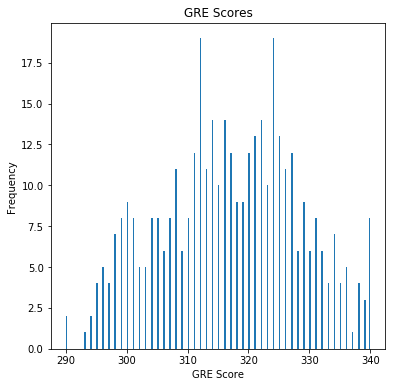

In [12]:
df["GRE Score"].plot(kind = 'hist',bins = 200,figsize = (6,6))
plt.title("GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("Frequency")
plt.show()

CGPA Scores for University Ratings:

As the quality of the university increases, the CGPA score increases.

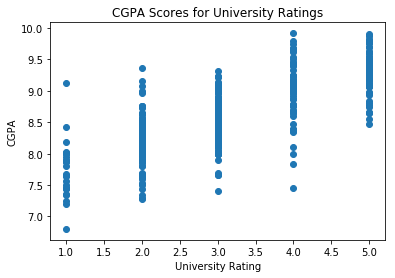

In [13]:
plt.scatter(df["University Rating"],df.CGPA)
plt.title("CGPA Scores for University Ratings")
plt.xlabel("University Rating")
plt.ylabel("CGPA")
plt.show()

Candidates with high GRE scores usually have a high CGPA score.


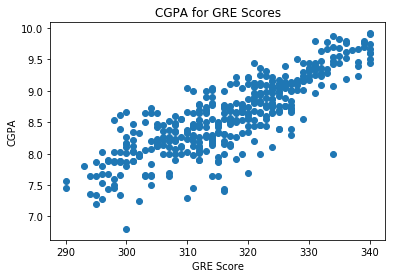

In [14]:
plt.scatter(df["GRE Score"],df.CGPA)
plt.title("CGPA for GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("CGPA")
plt.show()

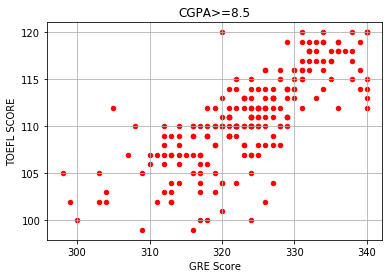

In [15]:
df[df.CGPA >= 8.5].plot(kind='scatter', x='GRE Score', y='TOEFL Score',color="red")
plt.xlabel("GRE Score")
plt.ylabel("TOEFL SCORE")
plt.title("CGPA>=8.5")
plt.grid(True)
plt.show()

Candidates who graduate from good universities are more fortunate to be accepted.


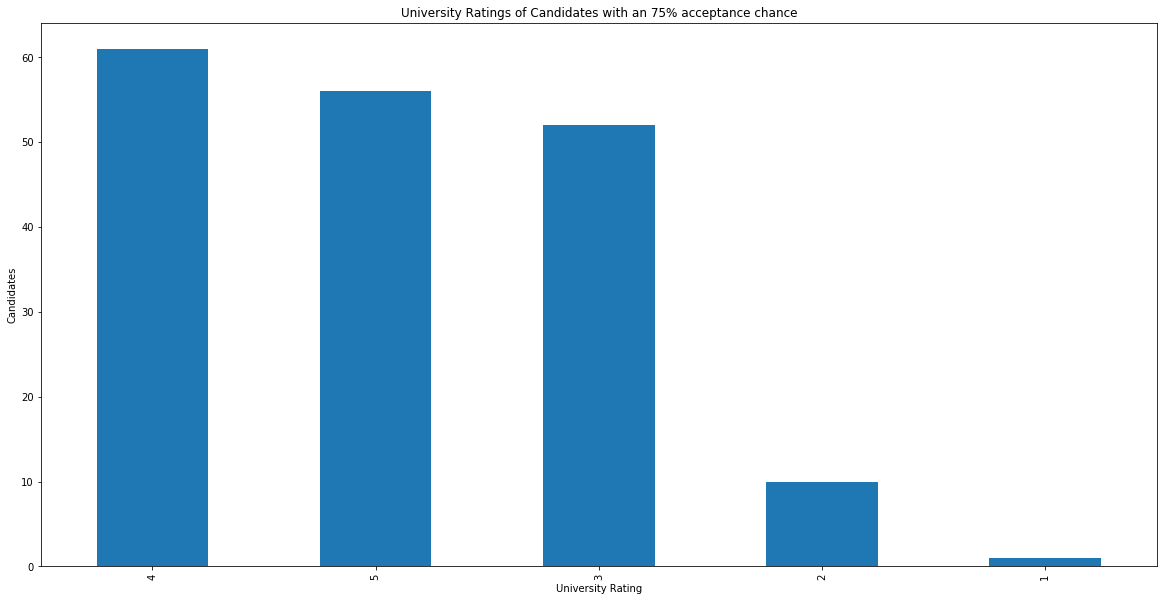

In [16]:
s = df[df["Chance of Admit"] >= 0.75]["University Rating"].value_counts().head(5)
plt.title("University Ratings of Candidates with an 75% acceptance chance")
s.plot(kind='bar',figsize=(20, 10))
plt.xlabel("University Rating")
plt.ylabel("Candidates")
plt.show()

Candidates with high CGPA scores usually have a high SOP score.


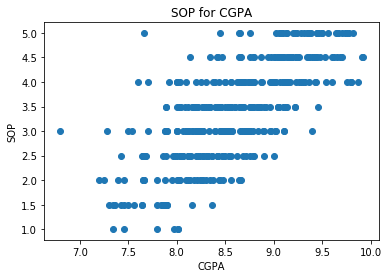

In [17]:
plt.scatter(df["CGPA"],df.SOP)
plt.xlabel("CGPA")
plt.ylabel("SOP")
plt.title("SOP for CGPA")
plt.show()

REGRESSION ALGORITHMS (SUPERVISED MACHINE LEARNING ALGORITHMS
Preparing Data for Regression
Serial No. is deleted because it stores index values. In the future this column does not benefit for regression algorithms.

In [0]:
# reading the dataset
url = 'https://raw.githubusercontent.com/nitindig/datascience/master/regression/Admission_Predict.csv'
df = pd.read_csv(url,sep = ",")

# it may be needed in the future.
serialNo = df["Serial No."].values

df.drop(["Serial No."],axis=1,inplace = True)

df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})

In [0]:
y = df["Chance of Admit"].values
x = df.drop(["Chance of Admit"],axis=1)

# separating train (80%) and test (%20) sets
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state = 42)

Normalization (min-max scaling):

It makes values scaled to a fixed range (0-1).

In [21]:
# normalization
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
x_train[x_train.columns] = scalerX.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scalerX.transform(x_test[x_test.columns])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

Note about r2_score:

It is the regression score function.
The best possible score is 1.0 for r2_score.
It may be negative.

# **Linear Regression**

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_head_lr = lr.predict(x_test)

print("real value of y_test[1]: " + str(y_test[1]) + " -> the predict: " + str(lr.predict(x_test.iloc[[1],:])))
print("real value of y_test[2]: " + str(y_test[2]) + " -> the predict: " + str(lr.predict(x_test.iloc[[2],:])))

from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test,y_head_lr))

y_head_lr_train = lr.predict(x_train)
print("r_square score (train dataset): ", r2_score(y_train,y_head_lr_train))

real value of y_test[1]: 0.68 -> the predict: [0.73430228]
real value of y_test[2]: 0.9 -> the predict: [0.90436809]
r_square score:  0.8212241793299224
r_square score (train dataset):  0.8157123222604522


# **Random Forest Regression**

In [23]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 42)
rfr.fit(x_train,y_train)
y_head_rfr = rfr.predict(x_test) 

from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test,y_head_rfr))
print("real value of y_test[1]: " + str(y_test[1]) + " -> the predict: " + str(rfr.predict(x_test.iloc[[1],:])))
print("real value of y_test[2]: " + str(y_test[2]) + " -> the predict: " + str(rfr.predict(x_test.iloc[[2],:])))


y_head_rf_train = rfr.predict(x_train)
print("r_square score (train dataset): ", r2_score(y_train,y_head_rf_train))

r_square score:  0.8531834754749059
real value of y_test[1]: 0.68 -> the predict: [0.7451]
real value of y_test[2]: 0.9 -> the predict: [0.9379]
r_square score (train dataset):  0.973331660706694


# **Decision Tree Regression**

In [24]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 42)
dtr.fit(x_train,y_train)
y_head_dtr = dtr.predict(x_test) 

from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test,y_head_dtr))
print("real value of y_test[1]: " + str(y_test[1]) + " -> the predict: " + str(dtr.predict(x_test.iloc[[1],:])))
print("real value of y_test[2]: " + str(y_test[2]) + " -> the predict: " + str(dtr.predict(x_test.iloc[[2],:])))

y_head_dtr_train = dtr.predict(x_train)
print("r_square score (train dataset): ", r2_score(y_train,y_head_dtr_train))

r_square score:  0.8002293224097611
real value of y_test[1]: 0.68 -> the predict: [0.78]
real value of y_test[2]: 0.9 -> the predict: [0.96]
r_square score (train dataset):  1.0


#Comparison of Regression Algorithms

Linear regression and random forest regression algorithms were better than decision tree regression algorithm.

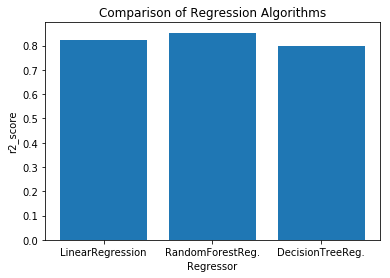

In [25]:
y = np.array([r2_score(y_test,y_head_lr),r2_score(y_test,y_head_rfr),r2_score(y_test,y_head_dtr)])
x = ["LinearRegression","RandomForestReg.","DecisionTreeReg."]
plt.bar(x,y)
plt.title("Comparison of Regression Algorithms")
plt.xlabel("Regressor")
plt.ylabel("r2_score")
plt.show()

In [27]:
print("real value of y_test[5]: " + str(y_test[5]) + " -> the predict: " + str(lr.predict(x_test.iloc[[5],:])))
print("real value of y_test[5]: " + str(y_test[5]) + " -> the predict: " + str(rfr.predict(x_test.iloc[[5],:])))
print("real value of y_test[5]: " + str(y_test[5]) + " -> the predict: " + str(dtr.predict(x_test.iloc[[5],:])))

print()

print("real value of y_test[50]: " + str(y_test[50]) + " -> the predict: " + str(lr.predict(x_test.iloc[[50],:])))
print("real value of y_test[50]: " + str(y_test[50]) + " -> the predict: " + str(rfr.predict(x_test.iloc[[50],:])))
print("real value of y_test[50]: " + str(y_test[50]) + " -> the predict: " + str(dtr.predict(x_test.iloc[[50],:])))

real value of y_test[5]: 0.94 -> the predict: [0.91160429]
real value of y_test[5]: 0.94 -> the predict: [0.9147]
real value of y_test[5]: 0.94 -> the predict: [0.92]

real value of y_test[50]: 0.86 -> the predict: [0.872162]
real value of y_test[50]: 0.86 -> the predict: [0.9108]
real value of y_test[50]: 0.86 -> the predict: [0.92]


This is the estimate and the actual acceptance possibilities made with 3 regression algorithms for test samples with 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75 indexes:



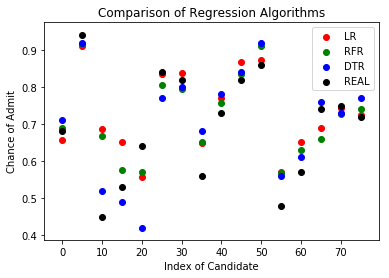

In [28]:
red = plt.scatter(np.arange(0,80,5),y_head_lr[0:80:5],color = "red")
green = plt.scatter(np.arange(0,80,5),y_head_rfr[0:80:5],color = "green")
blue = plt.scatter(np.arange(0,80,5),y_head_dtr[0:80:5],color = "blue")
black = plt.scatter(np.arange(0,80,5),y_test[0:80:5],color = "black")
plt.title("Comparison of Regression Algorithms")
plt.xlabel("Index of Candidate")
plt.ylabel("Chance of Admit")
plt.legend((red,green,blue,black),('LR', 'RFR', 'DTR', 'REAL'))
plt.show()

Comment:

Because most candidates in the data have over 70% chance, many unsuccessful candidates are not well predicted.


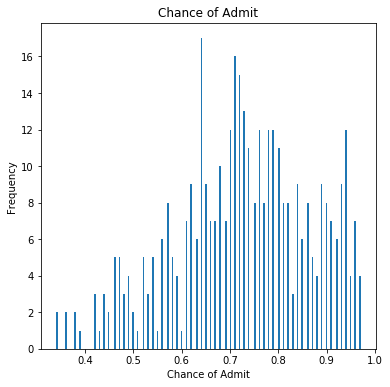

In [29]:
df["Chance of Admit"].plot(kind = 'hist',bins = 200,figsize = (6,6))
plt.title("Chance of Admit")
plt.xlabel("Chance of Admit")
plt.ylabel("Frequency")
plt.show()